In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import expm

## Trace elements

Segregation rate of two trace elements by equilibrium transport as a function of porosity, according to equation
\begin{equation}
  \label{eq:trace-segregation-rate}
  \frac{v^{\dico_j} - v^{\dico_k}}{v\liq-v\sol} = 
  \frac{\por\liq(\dico_k-\dico_j)}{(\por\liq+\dico_j)(\por\liq+\dico_k)}.
\end{equation}

The curve is plotted for two sets of $\dico_j,\dico_k$. Note the speed difference between the two trace elements is plotted as a fraction of the speed difference between liquid and solid.

In [2]:
Dj = 1e-3
Dk = 1e-2
phi = np.logspace(-5., 0., 1000)
f = phi*(Dk-Dj)/(phi+Dj)/(phi+Dk)
Djs = 2e-3
Dks = 0.5e-2
fs  = phi*(Dks-Djs)/(phi+Djs)/(phi+Dks)

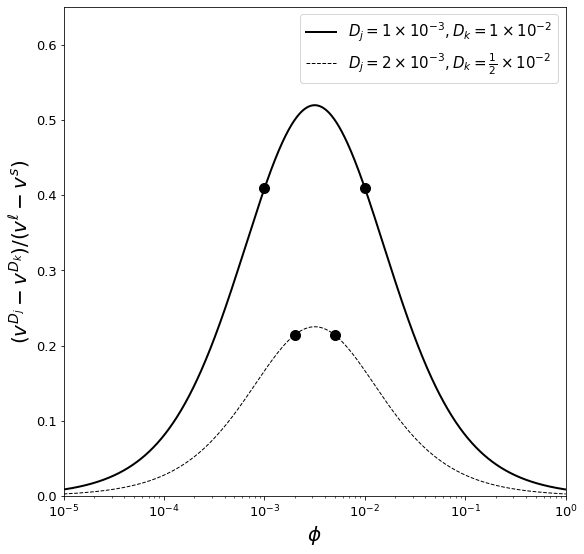

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

ax.semilogx(phi, f, '-k', linewidth=2, label=r'$D_j=1\times10^{-3},D_k=1\times10^{-2}$')
ax.plot([Dj, Dk], np.interp([Dj, Dk], phi, f), 'ok', markersize=10)
ax.semilogx(phi, fs, '--k', linewidth=1, label=r'$D_j=2\times10^{-3},D_k=\frac{1}{2}\times10^{-2}$')
ax.plot([Djs, Dks], np.interp([Djs, Dks], phi, fs), 'ok', markersize=10)

ax.set_xlim(1e-5, 1e0)
ax.set_ylim(0.0, 0.65)
ax.set_xticks((1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0))
ax.set_yticks((0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6))
ax.set_xlabel(r'$\phi$', fontsize=20)
ax.set_ylabel(r'$(v^{D_j}-v^{D_k})/(v^\ell-v^s)$', fontsize=20)
ax.legend(fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

## Closed-system evolution of a decay chain

### Evolution with melting only

The batch melting equation, parametrised as a function of time, is given by

\begin{equation}
  \label{eq:closedbox-batch-soln}
  \con\liq_j(t) = \frac{\con\sol_j\vert_0}
  {\dico_j + (1-\dico_j)\boxmeltrate t}.
\end{equation}

Figure below plots the closed system evolution of the uranium-series decay chain under melting only.

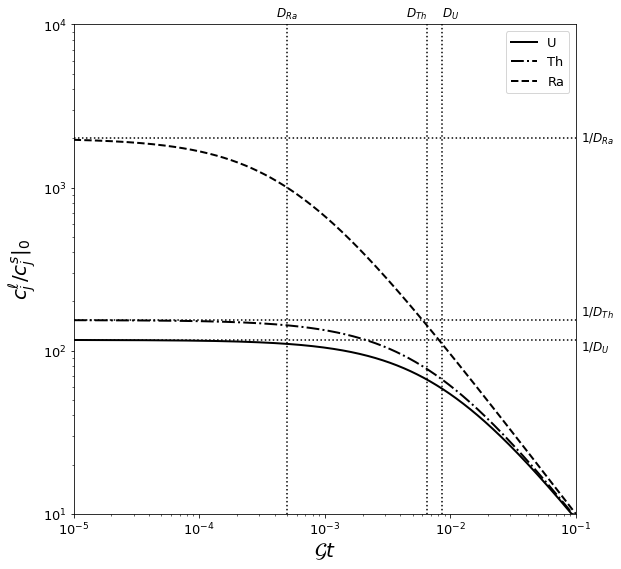

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

lamb_ = np.asarray([1.5e-10, 9.19e-6, 4.33e-4])
D = np.asarray([0.0086, 0.0065, 0.0005])
lsty = ['-', '-.', '--']
labl = [r'$D_{U}$', r'$D_{Th}$', r'$D_{Ra}$']
labm = [r'$1/D_{U}$', r'$1/D_{Th}$', r'$1/D_{Ra}$']
alh = ['left', 'right', 'center']
alv = ['top', 'bottom', 'center']

Gt = np.logspace(-5.0, -1.0, 1000)
clocs = np.asarray([np.power(di + (1.-di)*Gt, -1.0) for di in D])
lines = []

for clocsi, lstyi, Di, labli, alhi, labmi, alvi in zip(clocs, lsty, D, labl, alh, labm, alv):
    lines.append(plt.loglog(Gt, clocsi,'k', linewidth=2, linestyle=lstyi)[0])
    ax.plot([Di, Di], [1e-10, 1e10], ':k')[0]
    ax.plot([1e-5, 1e-1], [1./Di, 1./Di], ':k')[0]
    ax.text(Di, 10.1**4, labli, fontsize=12, verticalalignment='bottom', horizontalalignment=alhi)
    ax.text(0.11, 1./Di, labmi, fontsize=12, horizontalalignment='left', verticalalignment=alvi)

ax.set_xlim(1e-5, 1e-1)
ax.set_ylim(1e1, 1e4)
ax.set_xticks((1e-5, 1e-4, 1e-3, 1e-2, 1e-1))
ax.set_yticks((1e1, 1e2, 1e3, 1e4))
ax.set_xlabel(r'$\mathcal{G}t$', fontsize=20)
ax.set_ylabel(r'$c^\ell_j/c^s_j\vert_0$', fontsize=20)
ax.legend(handles=lines, labels=['U', 'Th', 'Ra'],loc='upper right', fontsize=13)
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()

### Evolution due to ingrowth only

The decay chain of N elements under the ingrowth assumption is given by

\begin{equation}
  \label{eq:closedbox-solution-nomelting}
  \actvec\liq(t) = \eigenvecs ~ \e^{\ddecaymatrix t} ~ \eigenvecs^{-1} ~ \actvec\liq\vert_0.
\end{equation}

Figure below plots the closed system evolution of the uranium-series decay chain under ingrowth only.

In [5]:
def eigenvectors(lamb_):
    l_ = len(lamb_)
    V = np.zeros(l_*l_, dtype=np.float128).reshape(l_, l_)
    iV = np.zeros(l_*l_, dtype=np.float128).reshape(l_, l_)

    for i in np.arange(0, l_):
        for j in np.arange(0, i+1):
            tmp = 1.
            for m in np.arange(i+1, l_):
                tmp = tmp*(lamb_[m]-lamb_[j])/lamb_[m]
            V[i, j] = tmp

    for i in np.arange(0, l_):
        for j in np.arange(0, i+1):
            tmp = 1.
            for m in np.arange(j, l_):
                if m != i:
                    tmp = tmp/(lamb_[m]-lamb_[i])
            for m in np.arange(j+1, l_):
                tmp = tmp*lamb_[m]
            iV[i, j] = tmp
    return V, iV

In [6]:
lambda_ = np.asarray([1.5e-10, 2.83e-6, 9.19e-6, 4.33e-4], dtype=np.float128)
D = np.asarray([0.0086, 0.0086, 0.0065, 0.0005], dtype=np.float128)
lsty = ['-',':','-.','--']
labl = [r'$\tau_{1/2}^{(238U)}$', r'$\tau_{1/2}^{(234U)}$',
        r'$\tau_{1/2}^{(230Th)}$', r'$\tau_{1/2}^{(226Ra)}$']
alv = ['bottom','bottom','bottom','bottom']
tmax = 11.0
t = np.logspace(0.0, tmax, 1000, dtype=np.float128)
al0 = np.asarray([1.0, 5.0, 2.0, 1.0], dtype=np.float128)/D
Ld = np.diag(-lambda_).astype(np.float128)
V, Vi = eigenvectors(lambda_)
expmLd = np.asarray([np.diag(expm(Ld*tj)) for tj in t])
expmLd = np.asarray([np.diag(eLd) for eLd in expmLd])
al = np.asarray([np.dot(np.dot(np.dot(V, eLd), Vi), al0) for eLd in expmLd])
lines = []

/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/matfuncs.py:740: RuntimeWarning: overflow encountered in sinh
  return np.sinh(x) / x
/Users/fredericoteixeira/Applications/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/matfuncs.py:764: RuntimeWarning: invalid value encountered in longdouble_scalars
  return t_12 * np.exp(a) * _sinch(b)


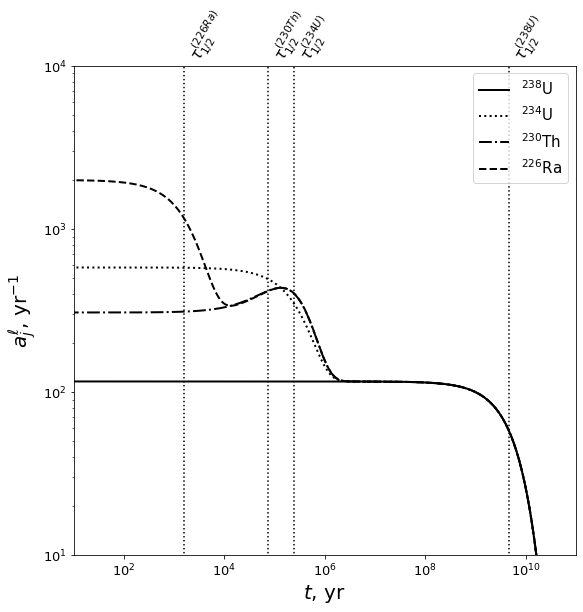

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

for ali, lstyi, lambdai, labli, alvi in zip(al.transpose(), lsty, lambda_, labl, alv):
    lines.append(plt.loglog(t, ali, 'k', linewidth=2, linestyle=lstyi)[0])
    ax.plot([np.log(2.)/lambdai, np.log(2.)/lambdai], [1e-10, 1e10], ':k')
    ax.text(np.log(2.)/lambdai, 1e4, labli, fontsize=15, 
            rotation=60, verticalalignment=alvi, horizontalalignment='left')

ax.set_xlim(1e1, 10**tmax)
ax.set_ylim(1e1, 1e4)
ax.set_xticks((1e2, 1e4, 1e6, 1e8, 1e10))
ax.set_yticks((1e1, 1e2, 1e3, 1e4))
ax.set_xlabel(r'$t$, yr', fontsize=20)
ax.set_ylabel(r'$a^\ell_j$, yr$^{-1}$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(handles=lines, 
          labels=['$^{238}$U', '$^{234}$U', '$^{230}$Th', '$^{226}$Ra'], 
          loc='upper right', fontsize=15)

plt.show()

### Evolution by both melting and ingrowth

The decay chain of N elements when melting and ingrowth processes are occurring simultaneously is given by

\begin{equation}
  \label{eq:closedbox-solution}
  \actvec\liq(t) = \eigenvecs ~ \e^{\ddecaymatrix t} ~ \eigenvecs^{-1} ~
  \left[ \frac{\actvec\sol\vert_0}{\dicovec + (1-\dicovec)\boxmeltrate t} \right]
\end{equation}

The activities are plotted below in terms of parent/daughter isotope ratios as a function of $\boxmeltrate t$, which corresponds to $F$ for values up to unity (at which $F$ is capped). Vertical lines mark key time-scales for ingrowth and melting. Horizontal lines mark the $\dico$ ratios of parent--daughter pairs that control the initial elemental fractionation (for small $F$).

#### Slow melting: $\mathcal{G}=\frac{1}{100} D_\textrm{Th} \big/ \tau^{(1/2)}_\textrm{Th}$

Figure below plots evolution for a slow melting rate, in which activity ratios go to secular equilibrium by ingrowth.

In [8]:
Dtag = ['',r'D_{U}',r'D_{Th}',r'D_{Ra}']
Ttag = ['','',r'\tau^{(1/2)}_{(230,Th)}',r'\tau^{(1/2)}_{(226,Ra)}']

Ttag_height = np.asarray([0.6, 0.6, 0.6], dtype=np.float128)
lambda_ = np.asarray([1.5e-10, 2.83e-6, 9.19e-6, 4.33e-4], dtype=np.float128)
D = np.asarray([0.0086, 0.0086, 0.0065, 0.0005], dtype=np.float128)
Q = lambda_[2:]*D[2:]/np.log(2.)
G = np.amin(Q)/100.
as0 = np.asarray([1., 1., 1., 1.], dtype=np.float128)
lsty = ['-','--']
as0 = np.asarray([1., 1., 1., 1.])
grey = 0.55

t = np.logspace(-10., 11., 1000, dtype=np.float128) * G
Ld = np.diag(-lambda_/G).astype(np.float128)
V, Vi = eigenvectors(lambda_)

F = np.minimum(t, 1., dtype=np.float128)
expmLd = np.asarray([np.diag(expm(Ld*tj)) for tj in t])
expmLd = np.asarray([np.diag(eLd) for eLd in expmLd])
VeLdVi = np.asarray([np.dot(V, np.dot(eLd, Vi)) for eLd in expmLd])
ald = np.asarray([np.dot(VeVi, as0/D) for VeVi in VeLdVi])
al = np.asarray([np.dot(VeVi, as0/(D + (1.-D)*f)) for VeVi, f in zip(VeLdVi, F)])
alb = np.asarray([as0/(D + (1-D)*f) for f in F])
lines = []

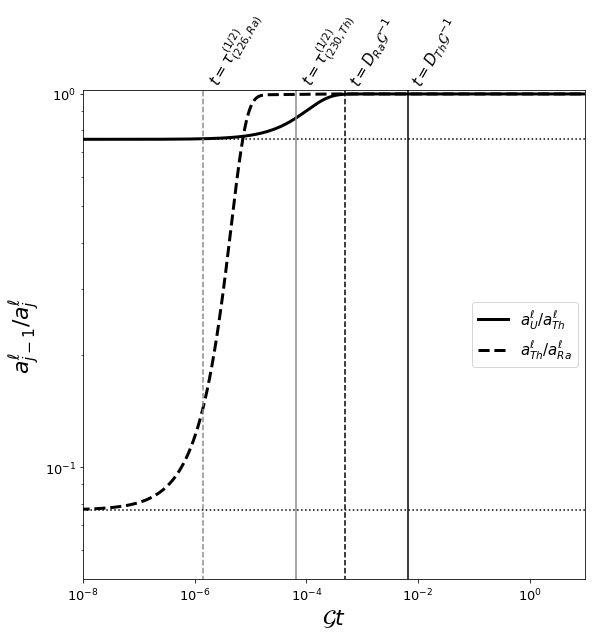

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

for i in np.arange(2, len(lambda_)):
    lines.append(plt.loglog(t, al[:, i-1]/al[:, i], 'k', linewidth=3, linestyle=lsty[i-2])[0])
    ax.plot([np.log(2.)/(lambda_[i]/G), np.log(2)/(lambda_[i]/G)], [1e-10, 1e10], 
             linestyle=lsty[i-2], color=[grey, grey, grey])
    ax.plot([D[i], D[i]], [1e-10, 1e10], 'k', linestyle=lsty[i-2])
    ax.plot([1e-10, 1e3], [D[i]/D[i-1], D[i]/D[i-1]], ':k')
    ax.text(np.log(2.)/(lambda_[i]/G), 1.025, f'$t={Ttag[i]}$', fontsize=15, rotation=60, 
            verticalalignment='bottom', horizontalalignment='left')
    ax.text(D[i], 1.025, f'$t={Dtag[i]}'+'\mathcal{G}^{-1}$', fontsize=15, rotation=60,
            verticalalignment='bottom', horizontalalignment='left')

ax.set_xlim(1e-8, 1e1)
ax.set_ylim(np.power(10., -1.3), np.power(10., 0.01))
ax.set_xticks((1e-8, 1e-6, 1e-4, 1e-2, 1e0))
ax.set_yticks((1e-1, 1e0))
ax.set_ylabel(r'$a^\ell_{j-1}/a^\ell_j$', fontsize=22)
ax.set_xlabel(r'$\mathcal{G}t$', fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(handles=lines, loc='center right', fontsize=15,
           labels=[r'$a^\ell_{U} /a^\ell_{Th}$', r'$a^\ell_{Th}/a^\ell_{Ra}$'])

plt.show()

#### Fast melting: $\mathcal{G}=100 D_\textrm{Ra} \big/ \tau_\textrm{Ra}^{(1/2)}$

Figure below plots evolution for a fast melting rate. Activity ratios go to secular equilibrium by dilution back to the activities of the solid (which were in secular equilibrium initially).

In [10]:
Dtag = ['',r'D_{U}',r'D_{Th}',r'D_{Ra}']
Ttag = ['','',r'\tau^{(1/2)}_{(230,Th)}',r'\tau^{(1/2)}_{(226,Ra)}']

Ttag_height = np.asarray([0.6, 0.6, 0.6], dtype=np.float128)
lambda_ = np.asarray([1.5e-10, 2.83e-6, 9.19e-6, 4.33e-4], dtype=np.float128)
D = np.asarray([0.0086, 0.0086, 0.0065, 0.0005], dtype=np.float128)
Q = lambda_[2:]*D[2:]/np.log(2.)
G = np.amax(Q)*100.
as0 = np.asarray([1., 1., 1., 1.], dtype=np.float128)
lsty = ['-','--']
as0 = np.asarray([1., 1., 1., 1.])
grey = 0.55

t = np.logspace(-10., 11., 1000, dtype=np.float128) * G
Ld = np.diag(-lambda_/G).astype(np.float128)
V, Vi = eigenvectors(lambda_)

F = np.minimum(t, 1., dtype=np.float128)
expmLd = np.asarray([np.diag(expm(Ld*tj)) for tj in t])
expmLd = np.asarray([np.diag(eLd) for eLd in expmLd])
VeLdVi = np.asarray([np.dot(V, np.dot(eLd, Vi)) for eLd in expmLd])
ald = np.asarray([np.dot(VeVi, as0/D) for VeVi in VeLdVi])
al = np.asarray([np.dot(VeVi, as0/(D + (1.-D)*f)) for VeVi, f in zip(VeLdVi, F)])
alb = np.asarray([as0/(D + (1-D)*f) for f in F])
lines = []

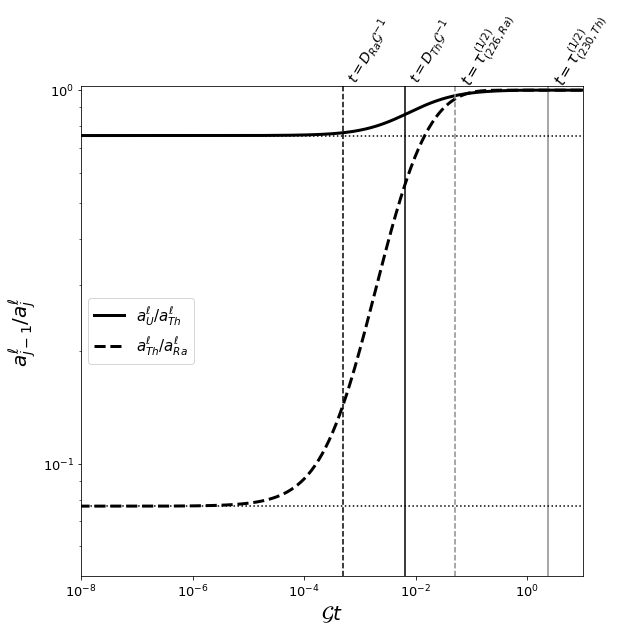

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(9.0, 9.0)

for i in np.arange(2, len(lambda_)):
    lines.append(plt.loglog(t, al[:, i-1]/al[:, i], 'k', linewidth=3, linestyle=lsty[i-2])[0])
    ax.plot([np.log(2.)/(lambda_[i]/G), np.log(2)/(lambda_[i]/G)], [1e-10, 1e10], 
             linestyle=lsty[i-2], color=[grey, grey, grey])
    ax.plot([D[i], D[i]], [1e-10, 1e10], 'k', linestyle=lsty[i-2])
    ax.plot([1e-10, 1e3], [D[i]/D[i-1], D[i]/D[i-1]], ':k')
    ax.text(np.log(2.)/(lambda_[i]/G), 1.0, f'$t={Ttag[i]}$', fontsize=15, rotation=60, 
            verticalalignment='bottom', horizontalalignment='left')
    ax.text(D[i], 1.025, f'$t={Dtag[i]}'+'\mathcal{G}^{-1}$', fontsize=14, rotation=60,
            verticalalignment='bottom', horizontalalignment='left')

ax.set_xlim(1e-8, 1e1)
ax.set_ylim(np.power(10., -1.3), np.power(10., 0.01))
ax.set_xticks((1e-8, 1e-6, 1e-4, 1e-2, 1e0))
ax.set_yticks((1e-1, 1e0))
ax.set_ylabel(r'$a^\ell_{j-1}/a^\ell_j$', fontsize=20)
ax.set_xlabel(r'$\mathcal{G}t$', fontsize=20)
ax.legend(handles=lines, loc='center left', fontsize=15,
           labels=[r'$a^\ell_{U} /a^\ell_{Th}$', r'$a^\ell_{Th}/a^\ell_{Ra}$'])
ax.tick_params(axis='both', which='major', labelsize=13)

plt.show()